In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load CSV Dataset

In [126]:
data = pd.read_csv('datasets/house_price_dataset/train.csv')
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


## Drop Categorical Columns

In [127]:
data.drop(['size_units', 'lot_size_units'], axis=1, inplace=True)

In [128]:
data.tail()

,beds,baths,size,lot_size,zip_code,price
2011,3,2.0,1370.0,0.5,98112,910000.0
2012,1,1.0,889.0,NaN,98121,550000.0
2013,4,2.0,2140.0,6250.0,98199,1150000.0
2014,2,2.0,795.0,NaN,98103,590000.0
2015,3,2.0,1710.0,4267.0,98133,659000.0


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  1669 non-null   float64
 4   zip_code  2016 non-null   int64  
 5   price     2016 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 94.6 KB


In [130]:
data.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [131]:
data.isnull().sum()

beds          0
baths         0
size          0
lot_size    347
zip_code      0
price         0
dtype: int64

In [132]:
data['lot_size'].fillna(np.random.uniform(1000, 9999, 1)[0], inplace=True)

In [133]:
data.isnull().sum()

beds        0
baths       0
size        0
lot_size    0
zip_code    0
price       0
dtype: int64

In [134]:
data.columns

Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')

## EDA(Exploratory Data Analysis)

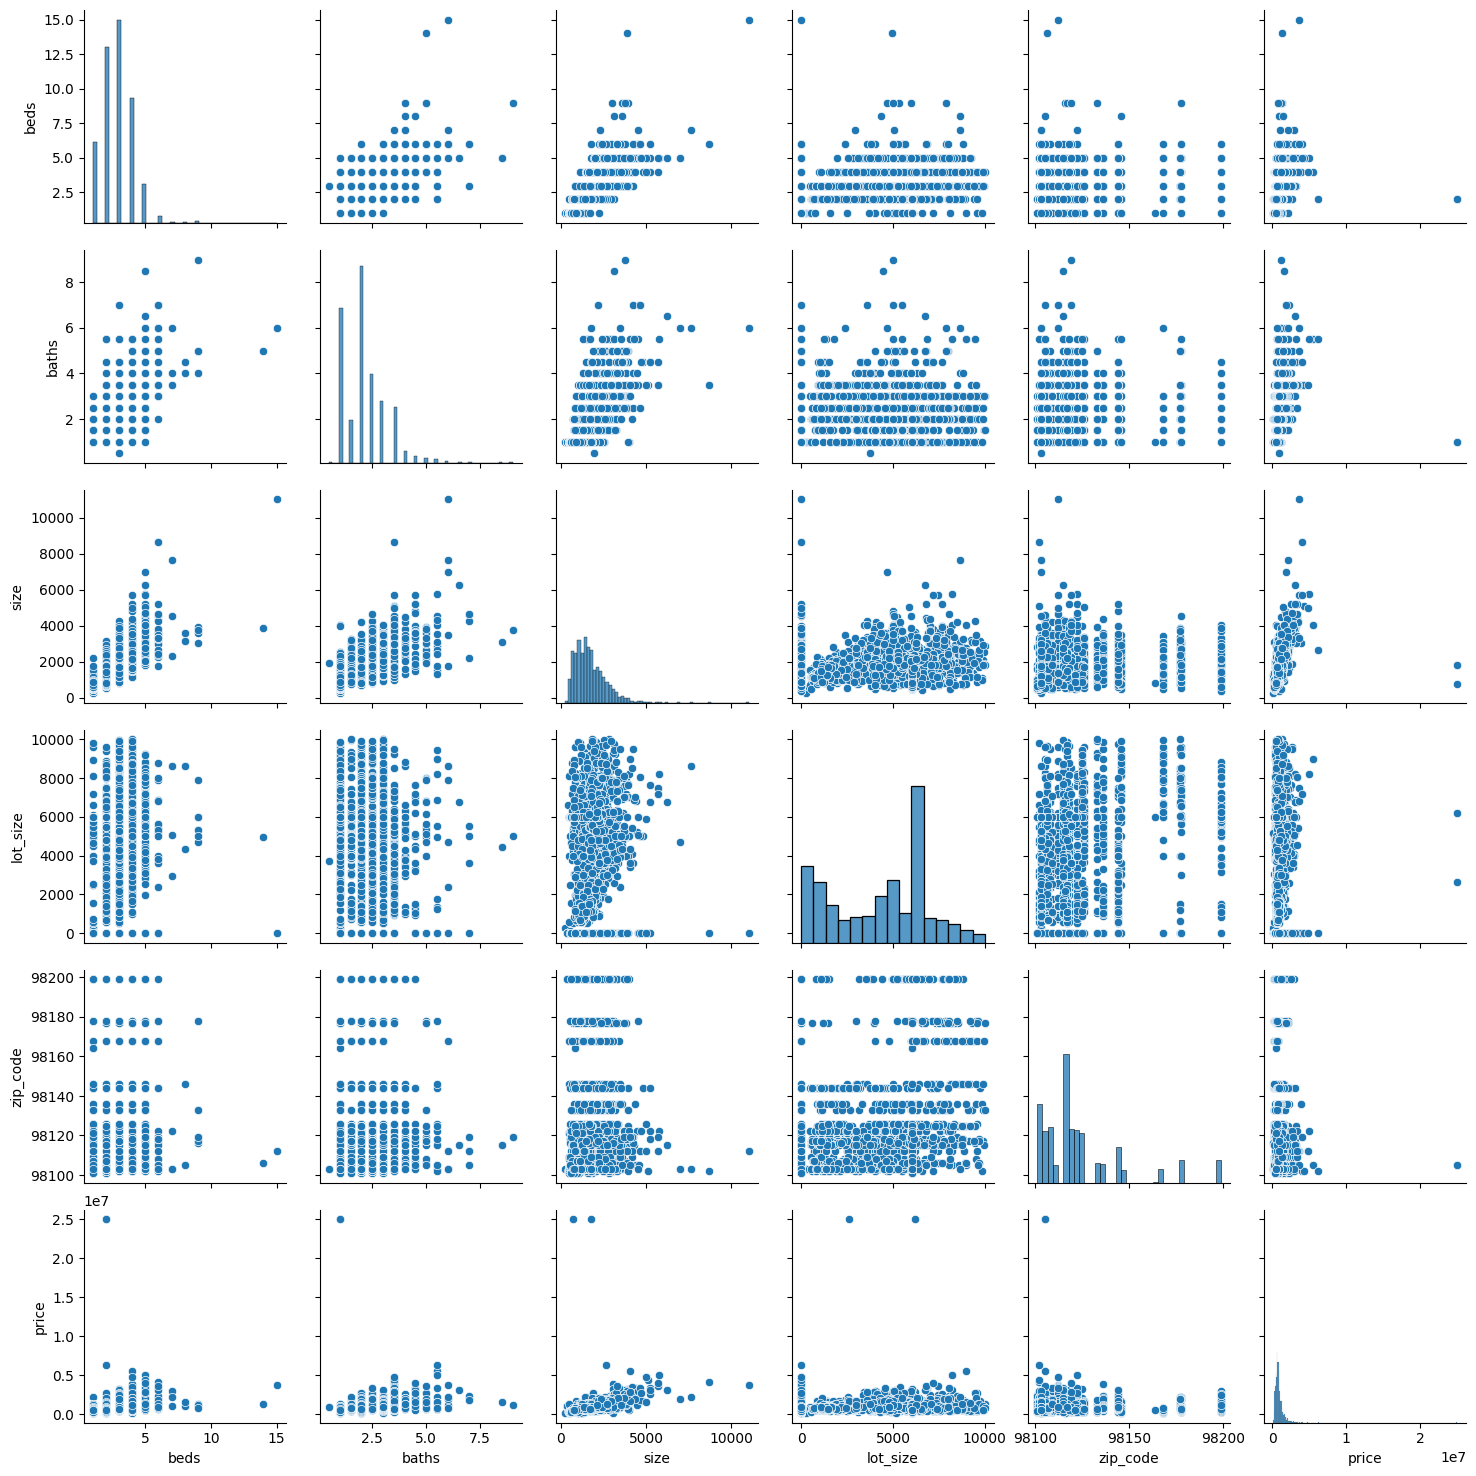

In [135]:
sns.pairplot(data)

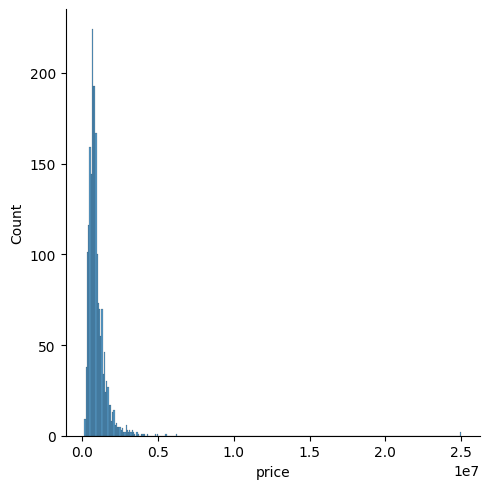

In [136]:
sns.displot(data['price'])

<AxesSubplot: >

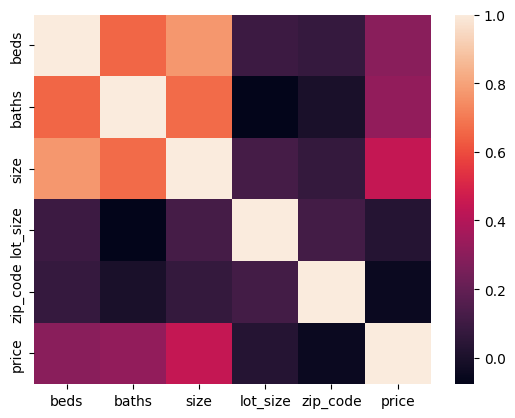

In [137]:
sns.heatmap(data.corr())

In [138]:
data

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.000000,98144,795000.0
1,4,2.0,2240.0,0.310000,98106,915000.0
2,4,3.0,2040.0,3783.000000,98107,950000.0
3,4,3.0,3800.0,5175.000000,98199,1950000.0
4,2,2.0,1042.0,6016.721027,98102,950000.0
...,...,...,...,...,...,...
2011,3,2.0,1370.0,0.500000,98112,910000.0
2012,1,1.0,889.0,6016.721027,98121,550000.0
2013,4,2.0,2140.0,6250.000000,98199,1150000.0
2014,2,2.0,795.0,6016.721027,98103,590000.0


In [139]:
y = data['price']
y.head()

0     795000.0
1     915000.0
2     950000.0
3    1950000.0
4     950000.0
Name: price, dtype: float64

In [140]:
X = data.iloc[:, :-1]
X.head()

,beds,baths,size,lot_size,zip_code
0,3,2.5,2590.0,6000.000000,98144
1,4,2.0,2240.0,0.310000,98106
2,4,3.0,2040.0,3783.000000,98107
3,4,3.0,3800.0,5175.000000,98199
4,2,2.0,1042.0,6016.721027,98102


### Split Data in traning & testing

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [143]:
X_train.shape

(1612, 5)

In [144]:
X_test.shape

(404, 5)

In [145]:
y_train.shape

(1612,)

In [146]:
y_test.shape

(404,)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lm = LinearRegression()

In [149]:
lm.fit(X_train, y_train)

LinearRegression()

## Predictions

In [150]:
predictions = lm.predict(X_test)

In [151]:
predictions.shape

(404,)

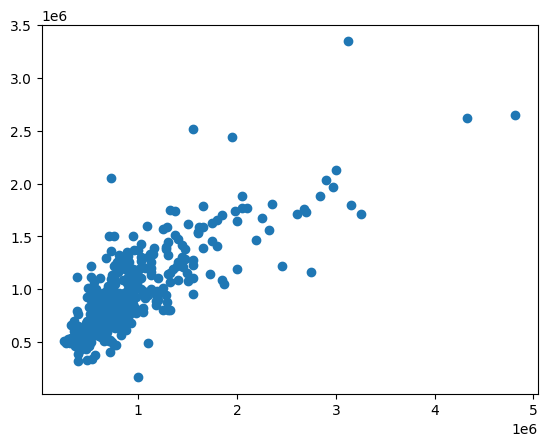

In [152]:
plt.scatter(y_test, predictions)

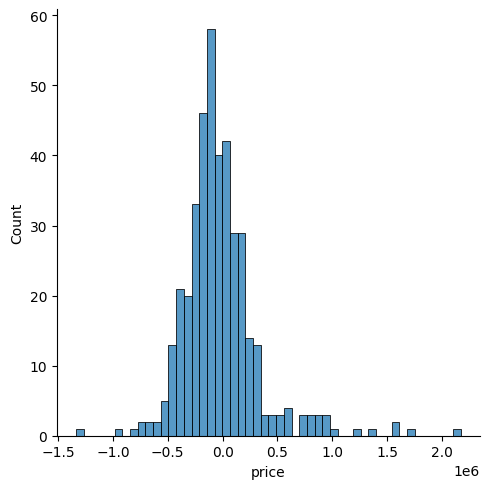

In [153]:
sns.displot((y_test-predictions), bins=50)